Resources Used
- wget.download('https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/_downloads/da4babe668a8afb093cc7776d7e630f3/generate_tfrecord.py')
- Setup https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

https://google.github.io/mediapipe/solutions/pose_classification.html#colabs
https://fr.acervolima.com/detection-de-reperes-de-visage-et-de-main-a-l-aide-de-python-mediapipe-opencv/
https://medium.com/analytics-vidhya/human-pose-comparison-and-action-scoring-using-deep-learning-opencv-python-c2bdf0ddecba

https://github.com/gabguerin/hand-gesture-recognition-mediapipe

# 0. Setup Paths

In [1]:
def train_model_FCNN(X_dataset, y_dataset):
    
    X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)
    fcnn = fcnn_model()
    print(fcnn.summary())

    cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)# Model checkpoint callback
    es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)# Callback for early stopping
        
    fcnn.compile(# Model compilation
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )    

    fcnn.fit(
        X_train, np.array(y_train),
        epochs=500,
        batch_size=32,
        validation_data=(X_test, np.array(y_test)),
        callbacks=[cp_callback, es_callback]
    )
    
    return fcnn

In [6]:
# from GMM.model_GMM import *
from FCNN.model_FCNN import *
from manager.webcam_manager import *
from manager.i_o_manager import *
from manager.actions import *
import keras

Mode = "TRAIN_MODE"
# Mode = "TEST_MODE"
Model = "FCNN"  # GMM
FPS_selected = 10
path_train = "./data/train"
path_test = './data/test'
path_train_pkl= './data/save_train_data.pkl'


if (Mode == "TRAIN_MODE"):
    if os.path.isfile(path_train_pkl) == True:  #Si y a des données dans le pickle
        X, Y = read_pickle(path_train_pkl)
    else:
        print("No data in the pinkle file")
        X, Y = data_extraction(path_train)
        save_pickle([X, Y], path_train_pkl)
        
    #to see if the data are good
    for i in range(len(Y)):
        print("Size sample ", i, " : ", X[i].shape)

        # X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X, Y, train_size=0.90, random_state=42)


    FCNN = train_model_FCNN(X_train, y_train)
    print("FCNN trained")
    FCNN.save('FCNN/FCNN_model')
    print("FCNN saved")
        
if(Mode == "TEST_MODE"):
    FCNN = keras.models.load_model('FCNN/FCNN_model')

classes = class_extract('data/train')
print("classes : ",classes)

No data in the pinkle file


 14%|█▍        | 1/7 [00:23<02:19, 23.29s/it]

Video extraite de :  ./data/train\\a_stop\WIN_20220309_18_03_35_Pro.mp4


 29%|██▊       | 2/7 [00:47<01:59, 23.90s/it]

Video extraite de :  ./data/train\\four\WIN_20220309_17_57_39_Pro.mp4


 43%|████▎     | 3/7 [01:16<01:45, 26.37s/it]

Video extraite de :  ./data/train\\one\WIN_20220309_18_02_14_Pro.mp4


 57%|█████▋    | 4/7 [01:41<01:17, 25.70s/it]

Video extraite de :  ./data/train\\three\WIN_20220309_17_58_49_Pro.mp4


 71%|███████▏  | 5/7 [02:07<00:51, 25.77s/it]

Video extraite de :  ./data/train\\two\WIN_20220309_18_01_16_Pro.mp4


 86%|████████▌ | 6/7 [02:31<00:25, 25.18s/it]

Video extraite de :  ./data/train\\x_no\WIN_20220309_18_03_07_Pro.mp4


100%|██████████| 7/7 [02:55<00:00, 25.10s/it]

Video extraite de :  ./data/train\\x_yes\WIN_20220309_18_02_43_Pro.mp4
Size sample  0  :  (42,)
Size sample  1  :  (42,)
Size sample  2  :  (42,)
Size sample  3  :  (42,)
Size sample  4  :  (42,)
Size sample  5  :  (42,)
Size sample  6  :  (42,)
Size sample  7  :  (42,)
Size sample  8  :  (42,)
Size sample  9  :  (42,)
Size sample  10  :  (42,)
Size sample  11  :  (42,)
Size sample  12  :  (42,)
Size sample  13  :  (42,)
Size sample  14  :  (42,)
Size sample  15  :  (42,)
Size sample  16  :  (42,)
Size sample  17  :  (42,)
Size sample  18  :  (42,)
Size sample  19  :  (42,)
Size sample  20  :  (42,)
Size sample  21  :  (42,)
Size sample  22  :  (42,)
Size sample  23  :  (42,)
Size sample  24  :  (42,)
Size sample  25  :  (42,)
Size sample  26  :  (42,)
Size sample  27  :  (42,)
Size sample  28  :  (42,)
Size sample  29  :  (42,)
Size sample  30  :  (42,)
Size sample  31  :  (42,)
Size sample  32  :  (42,)
Size sample  33  :  (42,)
Size sample  34  :  (42,)
Size sample  35  :  (42,)
Siz

 726  :  (42,)
Size sample  727  :  (42,)
Size sample  728  :  (42,)
Size sample  729  :  (42,)
Size sample  730  :  (42,)
Size sample  731  :  (42,)
Size sample  732  :  (42,)
Size sample  733  :  (42,)
Size sample  734  :  (42,)
Size sample  735  :  (42,)
Size sample  736  :  (42,)
Size sample  737  :  (42,)
Size sample  738  :  (42,)
Size sample  739  :  (42,)
Size sample  740  :  (42,)
Size sample  741  :  (42,)
Size sample  742  :  (42,)
Size sample  743  :  (42,)
Size sample  744  :  (42,)
Size sample  745  :  (42,)
Size sample  746  :  (42,)
Size sample  747  :  (42,)
Size sample  748  :  (42,)
Size sample  749  :  (42,)
Size sample  750  :  (42,)
Size sample  751  :  (42,)
Size sample  752  :  (42,)
Size sample  753  :  (42,)
Size sample  754  :  (42,)
Size sample  755  :  (42,)
Size sample  756  :  (42,)
Size sample  757  :  (42,)
Size sample  758  :  (42,)
Size sample  759  :  (42,)
Size sample  760  :  (42,)
Size sample  761  :  (42,)
Size sample  762  :  (42,)
Size sample  

In [7]:
y_pred=[]

for i in range(len(y_val)):
    y_pred.append(predict_model_FCNN(FCNN, X_val[i]) )

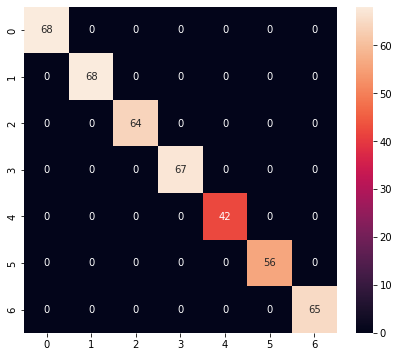

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        68
           2       1.00      1.00      1.00        64
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00        42
           5       1.00      1.00      1.00        56
           6       1.00      1.00      1.00        65

    accuracy                           1.00       430
   macro avg       1.00      1.00      1.00       430
weighted avg       1.00      1.00      1.00       430



In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

# Y_pred = model.predict(X_test)
# y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_val, y_pred)

In [16]:
import time

FPS=10
previousTime = time.time()
i=0
while(True):
    i+=1
    time.sleep(0.001)
    currentTime = time.time()
    t_prog=currentTime-previousTime #temps programme
    previousTime = currentTime
    if(t_prog < 1/FPS):
        time.sleep(2*1/FPS- t_prog)
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [88]:
import numpy as np

array = np.empty((0,3), int)

array = np.append(array, np.array([L]), axis=0)
array = np.append(array, np.array([L]), axis=0)

print(array)


[[1 2 3]
 [1 2 3]]


In [12]:
import  cv2
import pandas as pd
import numpy as np
import mediapipe as mp
import copy
import os

mp_hands = mp.solutions.hands

class myClass:
    def __init__(self, val):
        self.val=val
    def getVal(self):
        return self.val  

def read_video(path):
    mp_hands = mp.solutions.hands
    cap = cv2.VideoCapture(path)

    #construct head of the dataframe
    title=['frame']
    for i in range(21):
        title.append(str(i)+'_x')
        title.append(str(i)+'_y')
    df = pd.DataFrame(columns=title)

    idx=0

    with mp_hands.Hands(
        model_complexity=0,
        min_detection_confidence=0.5,
        min_tracking_confidence=0.5) as hands:
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("Ignoring empty camera frame.")
                break

            # To improve performance, optionally mark the image as not writeable to pass by reference.
            image.flags.writeable = False
            #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = hands.process(image)

            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            if results.multi_hand_landmarks:
                image_height, image_width, _ = image.shape

            if results.multi_hand_landmarks:
                L1=[]
                L1.append(idx)
                for i in range(21):
                    try :
                    #results.multi_handedness[0].classification[0].label
                        L1.append(results.multi_hand_landmarks[0].landmark[i].x * image_width)
                        L1.append(results.multi_hand_landmarks[0].landmark[i].y * image_height)
                    except:
                        L1.append(np.nan)
                        L1.append(np.nan)
                L1=normlization(L1)
                df_temp = pd.Series(L1, index = df.columns)
                df.loc[len(df)] = df_temp
                idx+=1
            
            pressedKey = cv2.waitKey(1) & 0xFF
            if pressedKey == ord("q"):  # Record pressing r
                break

    cap.release()
    return df




def normlization(L1):
    L=copy.copy(L1)
    #L=L[1:]
    x_base,y_base=0,0
    for i in range(1,len(L),2):
        if(i==0):
            x_base,y_base=L[0],L[1]
            L[0],L[1]=0,0
        else:
            L[i]=L[i]-x_base
            L[i+1]=L[i+1]-y_base
    return L





In [46]:
#   Main droite
# results.multi_hand_landmarks[0]

#hand_landmarks.landmark[1].x 
#results.multi_hand_landmarks[1]


In [ ]:
# results.multi_hand_landmarks[0]

# hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x


0.6501518487930298

Webcam with buffer

In [125]:
# import cv2
# import time
# import mediapipe as mp
# import collections
# d = collections.deque(maxlen=30)

# mp_drawing = mp.solutions.drawing_utils
# mp_drawing_styles = mp.solutions.drawing_styles
# mp_hands = mp.solutions.hands

# # For webcam input:
# cap = cv2.VideoCapture(0)
# previousTime = 0
# currentTime = 0

# title=['frame']
# for i in range(21):
#     title.append(str(i)+'_x')
#     title.append(str(i)+'_y')
# df = pd.DataFrame(columns=title)
# idx=0


# with mp_hands.Hands(
#     model_complexity=0,
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5) as hands:
#   while True:#cap.isOpened():
#         # Find OpenCV version
#     (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

#     success, image = cap.read()
#     if not success:
#       print("Ignoring empty camera frame.")
#       # If loading a video, use 'break' instead of 'continue'.
#       continue

#     # To improve performance, optionally mark the image as not writeable to
#     # pass by reference.
#     image.flags.writeable = False
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = hands.process(image)

#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
#     if results.multi_hand_landmarks:
#       for hand_landmarks in results.multi_hand_landmarks:
#         mp_drawing.draw_landmarks(
#             image,
#             hand_landmarks,
#             mp_hands.HAND_CONNECTIONS,
#             mp_drawing_styles.get_default_hand_landmarks_style(),
#             mp_drawing_styles.get_default_hand_connections_style())

#     if results.multi_hand_landmarks:
#       image_height, image_width, _ = image.shape

#     if results.multi_hand_landmarks:
#       L1=[]
#       L1.append(idx)
#       for i in range(21):
#           try :
#           #results.multi_handedness[0].classification[0].label
#               L1.append(results.multi_hand_landmarks[0].landmark[i].x * image_width)
#               L1.append(results.multi_hand_landmarks[0].landmark[i].y * image_height)
#           except:
#               L1.append(np.nan)
#               L1.append(np.nan)

#     d.append(normlization(L1))
#     idx+=1
    
#     image=cv2.flip(image, 1)
#     # Calculating the FPS
#     currentTime = time.time()
#     fps = 1 / (currentTime-previousTime)
#     previousTime = currentTime
#     # Displaying FPS on the image
#     cv2.putText(image, str(int(fps))+" FPS", (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
#     # Flip the image horizontally for a selfie-view display.
#     cv2.imshow('MediaPipe Hands', image)

#     pressedKey = cv2.waitKey(1) & 0xFF
#     if pressedKey == ord("q"):  # Record pressing r
#       cap.release()
#       break


# #print(d)



len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43
len L1 :  43

In [4]:
import cv2
import time
import mediapipe as mp
import collections
d = collections.deque(maxlen=30)

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For webcam input:
cap = cv2.VideoCapture(0)
previousTime = 0
currentTime = 0

seuil=-10000
buff_np=np.zeros([30,42])

title=['frame']
for i in range(21):
    title.append(str(i)+'_x')
    title.append(str(i)+'_y')
df = pd.DataFrame(columns=title)
idx=0

hands= mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5)

# with mp_hands.Hands(
#     model_complexity=0,
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5) as hands:
while True:#cap.isOpened():
      # Find OpenCV version
  (major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

  success, image = cap.read()
  if not success:
    print("Ignoring empty camera frame.")
    # If loading a video, use 'break' instead of 'continue'.
    continue

  # To improve performance, optionally mark the image as not writeable to
  # pass by reference.
  image.flags.writeable = False
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  results = hands.process(image)

  image.flags.writeable = True
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  
  if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(
          image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())

  if results.multi_hand_landmarks:
    image_height, image_width, _ = image.shape
  L1=[]
  if results.multi_hand_landmarks:
    L1=[]
    L1.append(idx)
    for i in range(21):
        try :
        #results.multi_handedness[0].classification[0].label
            L1.append(results.multi_hand_landmarks[0].landmark[i].x * image_width)
            L1.append(results.multi_hand_landmarks[0].landmark[i].y * image_height)
        except:
            L1.append(np.nan)
            L1.append(np.nan)

  d.append(normlization(L1))
  buff_np = np.array(d)[:, 1:]
  #buff_np = np.array(d)

  idx+=1
  if (idx>30):
    resultats=[]
    for hmm_model_num in range(len(hmm_models)):
        res=hmm_models[hmm_model_num].score(np.array(buff_np))
        resultats.append(res)
    print(resultats)
    ide=resultats.index(max(resultats))
    print("Best model : ", classes[ide])
    
    # seuil=-20000
    # if (max(resultats) > seuil):
    #   ide=resultats.index(max(resultats))
    #   print("Best model : ", classes[ide])
    # else:
    #   print("No matching signs ")

  
  image=cv2.flip(image, 1)
  # Calculating the FPS
  currentTime = time.time()
  fps = 1 / (currentTime-previousTime)
  previousTime = currentTime
  # Displaying FPS on the image
  cv2.putText(image, str(int(fps))+" FPS", (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
  # Flip the image horizontally for a selfie-view display.
  cv2.imshow('MediaPipe Hands', image)

  pressedKey = cv2.waitKey(1) & 0xFF
  if pressedKey == ord("q"): 
    cap.release()
    break

#print(d)

NameError: name 'hmm_models' is not defined

In [ ]:

try :
    ax = results.multi_handedness[0].classification[0].label
    
except:
    print("z")

z


In [5]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import time
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
L=[0,0,0,0,0]

previousTime = 0
currentTime = 0

# For webcam input:
#cap = cv2.VideoCapture(0)

# For video on the laptop:
cap = cv2.VideoCapture(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\pouce\pouce_test.mp4')

title=['frame']
for i in range(21):
  title.append(str(i)+'_x')
  title.append(str(i)+'_y')
df = pd.DataFrame(columns=title)#['frame','x_r_hand','y_r_hand','x_l_hand','y_l_hand'])

idx,x=0,0
data=np.array([])

with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      break
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
   
    if results.multi_hand_landmarks:
      image_height, image_width, _ = image.shape
      for hand_landmarks in results.multi_hand_landmarks:
   
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    image=cv2.flip(image, 1)
    # Calculating the FPS
    currentTime = time.time()
    fps = 1 / (currentTime-previousTime)
    previousTime = currentTime
    # Displaying FPS on the image
    cv2.putText(image, str(int(fps))+" FPS", (10, 70), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', image)
    
    pressedKey = cv2.waitKey(1) & 0xFF
    if pressedKey == ord("q"):  # Record pressing r
      break

  cap.release()

Test HMM

In [10]:
import glob
path = r'C:\Users\franc\Desktop\RT_Detection_AGV\data\train'
train_dir=[]

classes = next(os.walk( path) )
classes=classes[1]

for num_classes in range(len(classes)):
    train_dir.append(glob.glob(path+"\\"+classes[num_classes]))
print("path of the classes : ")
print(train_dir)

for gesture in range(len(train_dir)):
    for filename in glob.iglob(str(train_dir[gesture])[2:-2]+'\\\\*', recursive=True):
        print(filename)
        continue

StopIteration: 

Test download all the samples

In [6]:
import numpy as np
from tqdm import tqdm
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
train_arrays_lengths=[]
gestures_list=[]
list_gesture=[]

for gesture in tqdm(range(len(train_dir))):
    for filename in glob.iglob(str(train_dir[gesture])[2:-2]+'\\\\*', recursive=True):
        V=read_video(filename).to_numpy()
        continue
    V=V[:, 1:]
    print(V.shape)
    #V = np.expand_dims(V, axis = 0)
    list_gesture.append(V)
    train_arrays_lengths.append([V.shape[0]])
    
train_arrays= np.array(list_gesture, dtype=object)

print(train_arrays.shape)
print(train_arrays_lengths)

NameError: name 'train_dir' is not defined

In [116]:
T=copy.copy(train_arrays)

In [122]:
data = np.empty((0,42))
for i in range(train_arrays.shape[0]): data=np.append(data,train_arrays[i], axis=0)
print(data.shape)

(1940, 42)


1940

In [105]:
T=train_arrays
print(train_arrays.shape)
print(T.shape)

T.reshape(-1, 42).shape

(2,)
(2,)


ValueError: cannot reshape array of size 2 into shape (42)

In [39]:
#To save as pinkle
import pickle
file_name = "save_train_data.pkl"
train_arrays=np.array([])

open_file = open(file_name, "wb")
pickle.dump(train_arrays, open_file)
open_file.close()

In [16]:
#To read pinkle file
import pickle
file_name = "save_train_data.pkl"

open_file = open(file_name, "rb")
train_arrays = pickle.load(open_file)
open_file.close()

In [15]:
train_arrays.shape[0]

0

In [21]:
train_arrays_lengths_test=[]

for i in range(train_arrays.shape[0]):
    tmp=[]
    ok=0
    for j in range(int(train_arrays[i].shape[0]/30)):
        tmp.append(30)
    tmp.append(train_arrays[i].shape[0] - (j+1)*30)
    print(tmp)
    train_arrays_lengths_test.append(tmp)

print(train_arrays_lengths)

NameError: name 'train_arrays_lengths' is not defined

Read video for testing

In [13]:
path = r'C:\Users\franc\Desktop\RT_Detection_AGV\data\test'
test_dir=[]

classes = next(os.walk( path) )
classes=classes[1]

for num_classes in range(len(classes)):
    test_dir.append(glob.glob(path+"\\"+classes[num_classes]))
test_dir

for gesture in range(len(test_dir)):
    for filename in glob.iglob(str(test_dir[gesture])[2:-2]+'\\\\*', recursive=True):
        print(filename)
        V=read_video(filename).to_numpy()
        continue
    if 'test' in str(test_dir[gesture]): 
        V=V[:35, 1:]
    V = np.expand_dims(V, axis = 0)
    if(gesture==0): test_arrays=V
    else: test_arrays = np.append(test_arrays, V, axis=0)

print(test_arrays.shape)

C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\test\\five\test1.mp4
Ignoring empty camera frame.
C:\\Users\\franc\\Desktop\\RT_Detection_AGV\\data\\test\\pouce\pouce_test.mp4
Ignoring empty camera frame.
(2, 35, 42)


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [118]:

from hmmlearn.hmm import GaussianHMM 
import numpy as np
import glob
import tqdm
import os
from sklearn.metrics import confusion_matrix

states = 6
cov_type = 'spherical'
n_iter = 10000
tol=0.000001
algorithm ='viterbi' 
hmm_models=[]

for hmm_model_num in tqdm.tqdm(range(len(train_arrays))):
    model1=GaussianHMM(n_components=int(states), covariance_type=str(cov_type),n_iter = n_iter, tol =tol,algorithm=algorithm,
                       verbose=False, params="stmc").fit(train_arrays[hmm_model_num],train_arrays_lengths[hmm_model_num]) #7
    hmm_models.append(model1)

# for hmm_model_num in tqdm.tqdm(range(len(train_arrays))):
#     model1=GaussianHMM(n_components=int(states), covariance_type=str(cov_type),algorithm=algorithm,
#                        verbose=False, params="stmc").fit(train_arrays[hmm_model_num][1:],train_arrays_lengths[hmm_model_num]) #7
#     hmm_models.append(model1)

100%|██████████| 2/2 [00:00<00:00,  3.40it/s]


In [24]:
for sample in range(len(test_dir)):
    test_arrays[sample]
    print(test_arrays[sample].shape)

In [119]:
for sample in range(len(test_dir)):
    resultats=[]
    for hmm_model_num in range(len(hmm_models)):
        res=hmm_models[hmm_model_num].score(test_arrays[sample][:30])
        resultats.append(res)
    print(resultats)
    ide=resultats.index(max(resultats))
    print("Sample : ", str(test_dir[sample])[-7:-2], "|| Best model : ", classes[ide])

[-8265.09105247698, -12579.550363024162]
Sample :  \five || Best model :  five
[-10571.669182690724, -6713.907237563317]
Sample :  pouce || Best model :  pouce


Test GMM

In [68]:
T[0].shape[0]+T[1].shape[0]

70

In [65]:
T=test_arrays

T.reshape(70,42).shape

(70, 42)

In [89]:
import pickle

def read_pickle(file_name = "save_train_data.pkl"): #To read pinkle file
    # open_file = open(file_name, "rb")
    # train_arrays = pickle.load(open_file)
    train_arrays=np.load(file_name)
    # open_file.close()
    return train_arrays

read_pickle().shape[0]

if(read_pickle().shape[0] == 0):
    print("Le dossier est vide")



Le dossier est vide


In [57]:
test_arrays.shape
test_arrays2=np.array
for i in range(test_arrays.shape[0]):


(2, 35, 42)

In [36]:
test_arrays[0][:30,:].shape

test_arrays[1][:30,:].shape

new_train_arrays=test_arrays[0][:30,:]
new_train_arrays=np.append(new_train_arrays,test_arrays[1][:30,:],axis=0)
print(new_train_arrays.shape)

new_test_arrays=test_arrays[0][30:,:]
new_test_arrays=np.append(new_test_arrays,test_arrays[1][30:,:],axis=0)
print(new_test_arrays.shape)




(60, 42)
(10, 42)


In [52]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2, max_iter=1000, covariance_type='full').fit(new_train_arrays)



In [53]:
labels = gmm.predict(new_test_arrays)
print(labels)

[0 0 0 0 0 0 1 1 1 1]


In [54]:


probs = gmm.predict_proba(new_test_arrays)
print(probs[:].round(3))



[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


ValueError: 'c' argument has 10 elements, which is inconsistent with 'x' and 'y' with size 60.

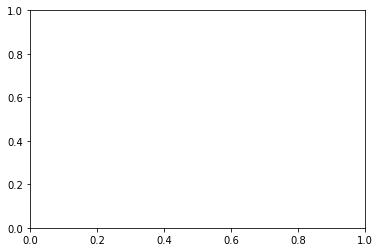

In [55]:
import matplotlib.pyplot as plt
plt.scatter(new_train_arrays[:, 0], new_train_arrays[:, 1], c=labels, cmap='viridis')

In [91]:
T=train_arrays
print(T.shape)
T.reshape(train_arrays[0].shape[0]+train_arrays[1].shape[0],42)

(2,)


ValueError: cannot reshape array of size 2 into shape (1940,42)

In [84]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2).fit(test_arrays)

#plt.scatter(X[:, 0], X[:, 1], c=classes, s=40, cmap='viridis')

ValueError: Found array with dim 3. Estimator expected <= 2.

In [ ]:
probs = gmm.predict_proba(test_arrays)

In [32]:
#from data import Data

train_df_five=read_video(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\five\test3.mp4')
test_df_five=read_video(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\five\test1.mp4')

train_df_pouce=read_video(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\pouce\pouce_train.mp4')
test_df_pouce=read_video(r'C:\Users\franc\Desktop\RT_Detection_AGV\data\pouce\pouce_test.mp4')

print(train_df_five.shape)
print(test_df_five.shape)
print(train_df_pouce.shape)
print(test_df_pouce.shape)

Ignoring empty camera frame.
Ignoring empty camera frame.
Ignoring empty camera frame.
Ignoring empty camera frame.
(995, 43)
(44, 43)
(945, 43)
(39, 43)


In [56]:
train_arrays=train_df_five.to_numpy()
train_arrays=train_arrays[:900, :]
#lenght of each sample
train_arrays_lengths=[100,100,100,100,100,100,100,100,100]
print(train_arrays.shape)
print(len(train_arrays_lengths))
print(train_arrays_lengths)



(900, 43)
9
[100, 100, 100, 100, 100, 100, 100, 100, 100]


In [57]:
train_arrays = np.expand_dims(train_arrays, axis = 0)
train_arrays[0].shape

(900, 43)

In [60]:
train_arrays22=train_df_pouce.to_numpy()

train_arrays22=train_arrays22[:900, :]
#lenght of each sample
train_arrays_lengths22=[100,100,100,100,100,100,100,100,100]
print(train_arrays22.shape)
print(len(train_arrays_lengths22))
print(train_arrays_lengths22)

train_arrays22 = np.expand_dims(train_arrays22, axis = 0)

(900, 43)
9
[100, 100, 100, 100, 100, 100, 100, 100, 100]


In [61]:
train_arrays = np.append(train_arrays, train_arrays22, axis=0)

(1940, 42)

In [67]:

train_arrays_lengths=[train_arrays_lengths,train_arrays_lengths22]

In [171]:
#df=df[['x_r_hand','y_r_hand']]    
data=df.to_numpy()

#data=data[30:34,1:]
data=data[:,1:]
print(data.shape)


(44, 42)


GMM

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [74]:
# Generate some data
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting


In [145]:
train_arrays.shape

(2,)

In [167]:
T=np.array(train_arrays[1][:100,:])
T=np.append(T,train_arrays[0][:100,:] ,axis=0)
T.shape

(200, 42)

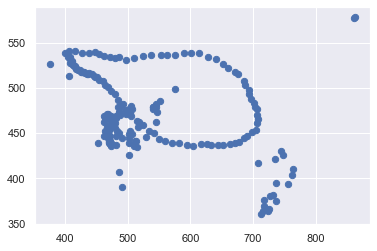

In [168]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2).fit(T)

plt.scatter(T[:400, 0], T[:400, 1], s=40, cmap='viridis')

In [169]:
test_arrays[0][:5,:].shape

(5, 42)

In [170]:
probs = gmm.predict_proba(test_arrays[0][:5,:])
print(probs[:5].round(3))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [171]:
probs = gmm.predict_proba(test_arrays[1][:5,:])
print(probs[:5].round(3))

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
